In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
angle = pd.read_excel('Angle.xls')
frequency = pd.read_excel('Frequency.xls')
voltage = pd.read_excel('Voltage Magnitude.xls')

# Loading Data

In [4]:
frequency.head()

,Timestamp,BADARPUR:Frequency
0,2021-09-11 06:12:16.840,50.008
1,2021-09-11 06:12:16.880,50.008
2,2021-09-11 06:12:16.920,50.009
3,2021-09-11 06:12:16.960,50.009
4,2021-09-11 06:12:17.000,50.008


# Frequency Analysis

<AxesSubplot:>

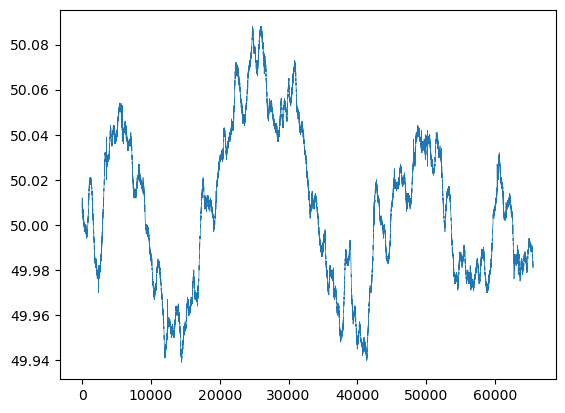

In [7]:
frequency['BADARPUR:Frequency'].plot(linewidth = 0.5)

In [23]:
freq2 = frequency['BADARPUR:Frequency'].copy()

In [27]:
freq_array = freq2.to_numpy()

In [58]:
##### code for denoising the data using fourier transform

In [28]:
def fft_denoiser(x, n_components, to_real=True):
    """Fast fourier transform denoiser.
    
    Denoises data using the fast fourier transform.
    
    Parameters
    ----------
    x : numpy.array
        The data to denoise.
    n_components : int
        The value above which the coefficients will be kept.
    to_real : bool, optional, default: True
        Whether to remove the complex part (True) or not (False)
        
    Returns
    -------
    clean_data : numpy.array
        The denoised data.
        
    References
    ----------
    .. [1] Steve Brunton - Denoising Data with FFT[Python]
       https://www.youtube.com/watch?v=s2K1JfNR7Sc&ab_channel=SteveBrunton
    
    """
    n = len(x)
    
    # compute the fft
    fft = np.fft.fft(x, n)
    
    # compute power spectrum density
    # squared magnitud of each fft coefficient
    PSD = fft * np.conj(fft) / n
    
    # keep high frequencies
    _mask = PSD > n_components
    fft = _mask * fft
    
    # inverse fourier transform
    clean_data = np.fft.ifft(fft)
    
    if to_real:
        clean_data = clean_data.real
    
    return clean_data

In [47]:
cleaned_frequency = fft_denoiser(freq_array, 00.1, to_real=True)

In [48]:
frequency['Cleaned frequency'] = cleaned_frequency

In [49]:
frequency.head()

,Timestamp,BADARPUR:Frequency,Cleaned frequency
0,2021-09-11 06:12:16.840,50.008,49.996235
1,2021-09-11 06:12:16.880,50.008,49.996248
2,2021-09-11 06:12:16.920,50.009,49.996262
3,2021-09-11 06:12:16.960,50.009,49.996275
4,2021-09-11 06:12:17.000,50.008,49.996289


##### Cleaned Frequency data

<AxesSubplot:>

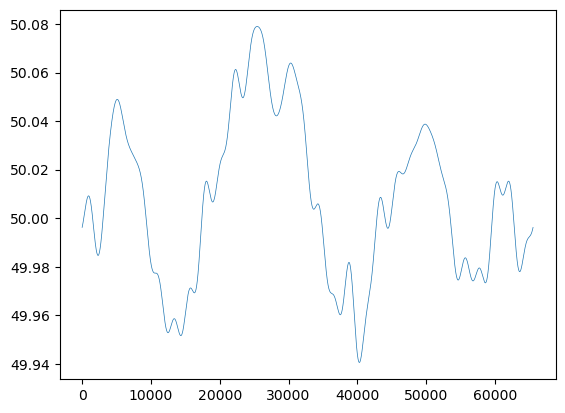

In [50]:
frequency['Cleaned frequency'].plot(linewidth = 0.5)

In [51]:
frequency_noise_analysis = frequency.copy()

In [52]:
frequency_noise_analysis['Noise'] = frequency_noise_analysis['BADARPUR:Frequency'] - frequency_noise_analysis['Cleaned frequency']

In [53]:
frequency_noise_analysis.head()

,Timestamp,BADARPUR:Frequency,Cleaned frequency,Noise
0,2021-09-11 06:12:16.840,50.008,49.996235,0.011765
1,2021-09-11 06:12:16.880,50.008,49.996248,0.011752
2,2021-09-11 06:12:16.920,50.009,49.996262,0.012738
3,2021-09-11 06:12:16.960,50.009,49.996275,0.012725
4,2021-09-11 06:12:17.000,50.008,49.996289,0.011711


### This is the noise in the signal

<AxesSubplot:>

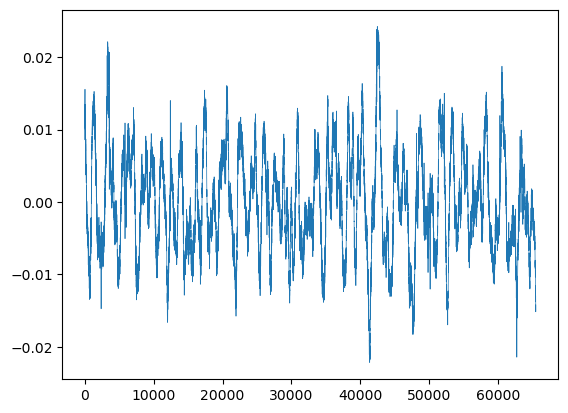

In [55]:
frequency_noise_analysis['Noise'].plot(linewidth = 0.5)

##### SNR

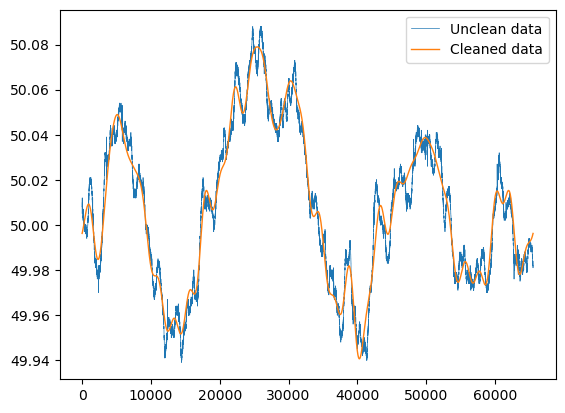

In [80]:
plt.plot(frequency_noise_analysis['BADARPUR:Frequency'], label = 'Unclean data', linewidth = 0.5)
plt.plot(frequency_noise_analysis['Cleaned frequency'], label = 'Cleaned data', linewidth = 1)
plt.legend()

#### SNR

[Check link for formula used](https://postimg.cc/LYK8t9XP)

In [77]:
snr = 20 * np.log10(np.mean(frequency_noise_analysis['BADARPUR:Frequency'])/np.std(frequency_noise_analysis['BADARPUR:Frequency']))

In [78]:
snr

63.35946464007045